STAT 479: Deep Learning (Spring 2019)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)  
Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat479-ss2019/  
GitHub repository: https://github.com/rasbt/stat479-deep-learning-ss19

In [ ]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p matplotlib,torch,pandas

# HW 2: Implementing a Neuron with Nonlinear Activation (40 pts)

### Important!

**The homework assignment is due on Thu, Feb 21, 2019 (11:59 pm) and should be submitted via Canvas.**

- Please submit the `.ipynb` file with your solution as well as an HTML version (use `File -> export as -> HTML`) as a backup in case we cannot open your .ipynb on our computer.

- I recommend using the conda package manager for installing Python 3.7 and Jupyter Notebook (or Jupyter Lab). You may find the lecture notes from my previous machine learning class (https://github.com/rasbt/stat479-machine-learning-fs18/blob/master/03_python/03_python_notes.pdf, Section 3) helpful. 

- Also consider this YouTube tutorial for a more visual setup guide for conda: https://www.youtube.com/watch?v=YJC6ldI3hWk (Python Tutorial: Anaconda - Installation and Using Conda). Please reach out to me or the TA if you need any help of have questions.


# Problem Setting

Suppose you have a neuron model similar to ADALINE (discussed in class) but the activation function (which is an identity function in ADALINE) is replaced by a non-linear activation function. 

![](../images/neuron.png)


This activation function is defined as


$$
\sigma(z) = \frac{1}{1 + e^{-z}},
$$

where z denotes the net input,  $z = \mathbf{w}^\top \mathbf{x}$ (for a single training example, we write $z^{[i]} = \mathbf{w}^\top \mathbf{x}^{[i]}$).

Assume now that we want learn the parameters of the neuron model for a binary classification task with class labels $y \in \{0, 1\}$ similar to ADALINE. We use the same loss function, mean squared error (MSE), as in ADALINE, during training:

$$
\mathcal{L}(\mathbf{\hat{y}}, \mathbf{y}) = \frac{1}{n} \sum_{i}^{} (\hat{y}^{[i]} - y^{[i]})^2.
$$

## TASK 1: Compute the Loss Gradients with respect to the weights and bias unit

Your task is to derive the gradient of the loss $\mathcal{L}$ with respect to the weight vector and the bias unit and formulate the learning rule. 

Remember that the gradient of the loss is defined as 

$$
\nabla_\mathbf{w} \mathcal{L}(\mathbf{w}) = 
\begin{bmatrix}
\frac{\partial \mathcal{L}(\mathbf{w})}{\partial w_1}\\
\vdots \\
\frac{\partial \mathcal{L}(\mathbf{w})}{\partial w_m}\\
\end{bmatrix}
$$

**For simplicity, it is sufficient if you write down the partial derivative and learning rule for a single weight $w_j$ and the bias unit $b$**. 

To provide you with a hint, recall that we computed the partial Loss derivatives for ADALINE as follows:

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial w_j} &= \frac{\partial}{\partial w_j} \frac{1}{n} \sum_i (\hat{y}^{[i]} - y^{[i]} )^2\\
&= \frac{\partial}{\partial w_j}  \frac{1}{n} \sum_i (\sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) - y^{[i]})^2\\
\\
&= \quad ... \\
\\
&= \sum_i \frac{2}{n}  (\sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) - y^{[i]})   x_j^{[i]}
\end{align}
$$

<br>
<br>

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial b} &= \frac{\partial}{\partial b} \frac{1}{n}\sum_i (\hat{y}^{[i]} - y^{[i]} )^2\\
&= \frac{\partial}{\partial b}  \frac{1}{n} \sum_i (\sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) - y^{[i]})^2\\
\\
&= \quad ... \\
\\
&= \sum_i \frac{2}{n}  (\sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) - y^{[i]})
\end{align}
$$

Again, your task is to derive $\frac{\partial \mathcal{L}}{\partial w_j}$ and $\frac{\partial \mathcal{L}}{\partial b}$ for the neuron model with the non-linear activation function $\sigma(\mathbf{w}^\top \mathbf{x}) =  1 / (1+exp(-\mathbf{w}^\top \mathbf{x}))$.

For partial credits in case of a wrong solution, also write down the individual steps in the cell below.

---

**!!!Fill in with your solution below!!!**

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial w_j} &= \frac{\partial}{\partial w_j} \frac{1}{n}\sum_i (\hat{y}^{[i]} - y^{[i]} )^2\\
&= \frac{\partial}{\partial w_j} \frac{1}{n}\sum_i (\sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) - y^{[i]} )^2\\
&= \frac{2}{n}\sum_i (\sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) - y^{[i]} ) \frac{\partial}{\partial w_j} \sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) \\
&= \frac{2}{n}\sum_i \left(\frac{1}{1+\exp(-\mathbf{w}^T\mathbf{x}^{[i]} - b)} - y^{[i]} \right) \frac{\partial}{\partial w_j} \frac{1}{1+\exp(-\mathbf{w}^T\mathbf{x}^{[i]} - b)} \\
&= \frac{2}{n}\sum_i \left(\frac{1}{1+\exp(-\mathbf{w}^T\mathbf{x}^{[i]} - b)} - y^{[i]} \right) \frac{x_j^{[i]} \exp(-\mathbf{w}^T\mathbf{x}^{[i]} - b)}{\left(1+\exp(-\mathbf{w}^T\mathbf{x}^{[i]} - b)\right)^2} \\
\end{align}
$$

<br>
<br>

**!!!Fill in with your solution below!!!**
$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial b} &= \frac{\partial}{\partial b} \frac{1}{n} \sum_i (\hat{y}^{[i]} - y^{[i]} )^2\\
&= \frac{\partial}{\partial b} \frac{1}{n}\sum_i (\sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) - y^{[i]} )^2\\
&= \frac{2}{n}\sum_i (\sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) - y^{[i]} ) \frac{\partial}{\partial b} \sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) \\
&= \frac{2}{n}\sum_i \left(\frac{1}{1+\exp(-\mathbf{w}^T\mathbf{x}^{[i]} - b)} - y^{[i]} \right) \frac{\partial}{\partial b} \frac{1}{1+\exp(-\mathbf{w}^T\mathbf{x}^{[i]} - b)} \\
&= \frac{2}{n}\sum_i \left(\frac{1}{1+\exp(-\mathbf{w}^T\mathbf{x}^{[i]} - b)} - y^{[i]} \right) \frac{\exp(-\mathbf{w}^T\mathbf{x}^{[i]} - b)}{\left(1+\exp(-\mathbf{w}^T\mathbf{x}^{[i]} - b)\right)^2} \\
\end{align}
$$

---

# Experimental Section

Complete the code below, the missing parts are indicated via 

    # <YOUR CODE HERE>
    
to implement the neuron model (it is very similar to the ADALINE model we discussed in class, except the derivatives).

## Imports (Just Execute)

**No modification required.** You should execute this code and are encouraged to explore it further, but it is recommended to  not make any alterations here.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
%matplotlib inline

## Loading the dataset (Just Execute)

**No modification required.** You should execute this code and are encouraged to explore it further, but it is recommended to  not make any alterations here.

In [2]:
df = pd.read_csv('../hw2_dataset_iris.data', index_col=None, header=None)
df.columns = ['x1', 'x2', 'x3', 'x4', 'y']
df = df.iloc[50:150]
df['y'] = df['y'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)
df.tail()

,x1,x2,x3,x4,y
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


In [3]:
# Assign features and target

X = torch.tensor(df[['x2', 'x3']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.int)

# Shuffling & train/test split

torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

X, y = X[shuffle_idx], y[shuffle_idx]

percent70 = int(shuffle_idx.size(0)*0.7)

X_train, X_test = X[shuffle_idx[:percent70]], X[shuffle_idx[percent70:]]
y_train, y_test = y[shuffle_idx[:percent70]], y[shuffle_idx[percent70:]]

# Normalize (mean zero, unit variance)

mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

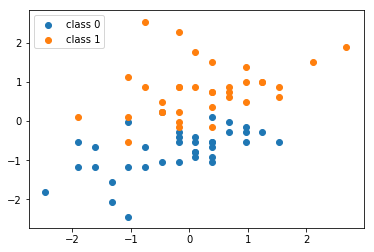

In [4]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='class 1')
plt.legend()
plt.show()

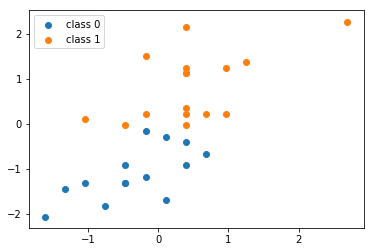

In [5]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label='class 1')
plt.legend()
plt.show()

## TASK 2: Implement the Neuron Model

Your task is to complete the `backward` method to compute the gradients based on the gradients you computed in TASK1.

In [28]:
class NeuronModel():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, 
                                   dtype=torch.float)
        self.bias = torch.zeros(1, dtype=torch.float)
        
    def activation_func(self, x):
        return 1. / (1. + torch.exp(-x))
    
    def netinput_func(self, x, w, b):
         return torch.add(torch.mm(x, w), b)

    def forward(self, x):
        netinputs = self.netinput_func(x, self.weights, self.bias)
        activations = self.activation_func(netinputs)
        return activations.view(-1)
        
    def backward(self, x, yhat, y):  
        
        # note that here, "yhat" are the "activations" 
        netinputs = self.netinput_func(x, self.weights, self.bias)
        
        ###############################################################################
        # YOU ONLY NEED TO EDIT IN THE BOX BELOW
        ###############################################################################
        print(x.t())
        
        grad_loss_yhat = 2.*(y - yhat)
        grad_yhat_bias = torch.exp(-netinputs)*self.activation_func(netinputs)**2
        grad_yhat_weights = torch.mm(x.t(),torch.exp(-netinputs))*self.activation_func(netinputs)**2
        
        grad_loss_weights = grad_loss_yhat*grad_yhat_weights/y.size(0)
        
        grad_loss_bias = grad_loss_yhat*grad_yhat_bias/y.size(0)
        ################################################################################
        
        return (-1)*grad_loss_weights, (-1)*grad_loss_bias

## No modifications required beyond this point

You do not need to modify anything below. However, you should run and analyze the code to verify that your implementation of the Neuron model is likely correct.

## Training the Neuron Model (Just Execute)

In [7]:
####################################################
##### Training and evaluation wrappers
###################################################

def loss(yhat, y):
    return torch.mean((yhat - y)**2) / y.size(0)


def train(model, x, y, num_epochs,
          learning_rate=0.01, seed=123, minibatch_size=10):
    cost = []
    
    torch.manual_seed(seed)
    for e in range(num_epochs):
        
        #### Shuffle epoch
        shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)
        minibatches = torch.split(shuffle_idx, minibatch_size)
        
        for minibatch_idx in minibatches:

            #### Compute outputs ####
            yhat = model.forward(x[minibatch_idx])

            #### Compute gradients ####
            negative_grad_w, negative_grad_b = \
                model.backward(x[minibatch_idx], yhat, y[minibatch_idx])

            #### Update weights ####
            model.weights += learning_rate * negative_grad_w
            model.bias += learning_rate * negative_grad_b
            
            #### Logging ####
            #minibatch_loss = loss(yhat, y[minibatch_idx])
            #print('    Minibatch MSE: %.3f' % minibatch_loss)

        #### Logging ####
        yhat = model.forward(x)
        curr_loss = loss(yhat, y)
        print('Epoch: %03d' % (e+1), end="")
        print(' | MSE: %.5f' % curr_loss)
        cost.append(curr_loss)

    return cost

In [29]:
model = NeuronModel(num_features=X_train.size(1))
cost = train(model, 
             X_train, y_train.float(),
             num_epochs=150,
             learning_rate=0.5,
             seed=123,
             minibatch_size=10)

tensor([[ 0.6795,  0.1064, -2.4725, -0.1801, -1.0398,  2.1123, -0.1801,  2.6854,
          1.5392,  0.1064],
        [-0.0292, -0.7966, -1.8198, -0.1571, -0.5408,  1.5055,  2.2729,  1.8892,
         -0.5408, -0.5408]])


RuntimeError: The size of tensor a (2) must match the size of tensor b (10) at non-singleton dimension 0

## Evaluate the Trained Model  (Just Execute)

In [ ]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
print('Weights', model.weights)
print('Bias', model.bias)

In [ ]:
def custom_where(cond, x_1, x_2):
    return (cond * x_1) + ((1-cond) * x_2)

In [ ]:
train_pred = model.forward(X_train)
train_acc = torch.mean(
    (custom_where(train_pred > 0.5, 1, 0).int() == y_train).float())

test_pred = model.forward(X_test)
test_acc = torch.mean(
    (custom_where(test_pred > 0.5, 1, 0).int() == y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Test Accuracy: %.2f' % (test_acc*100))

## Decision Boundary  (Just Execute)

In [ ]:
##########################
### 2D Decision Boundary
##########################

w, b = model.weights, model.bias

x_min = -3
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 3
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()